# Programming languages - Relationship between joy and opportunities
## by Christian Bienias

### Business Questions
* What are currently the most desired programming languages?
* What are currently the most used programming languages?
* Is there a coherence between satisfied & dissatisfied programming languages?
* Is there a coherence between used and disered programming language?

> The analyses refer to the  [Stack Overflow Annual Developer Survey 2020](https://insights.stackoverflow.com/survey/2020) dataset.

In [81]:
# importing the libraries
import pandas as pd
import matplotlib.pyplot as plt
#import AllTogether as t
import seaborn as sns
%matplotlib inline
# individual options pandas&seaborn
pd.set_option('display.max_columns', None)
sns.set_style('darkgrid')


In [6]:
# loading the csv to dataframe
df = pd.read_csv (r'C:\Users\qxz1gi1\Desktop\Data Scientist\Project 1\Jupyter Notebook\survey_results_public_2020.csv')
#df2019 = pd.read_csv (r'C:\Users\chris\OneDrive\Desktop\Data Scientist\Project 1\Jupyter Notebook\survey_results_public_2019.csv')
#df2018 = pd.read_csv (r'C:\Users\chris\OneDrive\Desktop\Data Scientist\Project 1\Jupyter Notebook\survey_results_public_2018.csv')

# get an overview of the data
df.head()

,Respondent,MainBranch,Hobbyist,Age,Age1stCode,CompFreq,CompTotal,ConvertedComp,Country,CurrencyDesc,CurrencySymbol,DatabaseDesireNextYear,DatabaseWorkedWith,DevType,EdLevel,Employment,Ethnicity,Gender,JobFactors,JobSat,JobSeek,LanguageDesireNextYear,LanguageWorkedWith,MiscTechDesireNextYear,MiscTechWorkedWith,NEWCollabToolsDesireNextYear,NEWCollabToolsWorkedWith,NEWDevOps,NEWDevOpsImpt,NEWEdImpt,NEWJobHunt,NEWJobHuntResearch,NEWLearn,NEWOffTopic,NEWOnboardGood,NEWOtherComms,NEWOvertime,NEWPurchaseResearch,NEWPurpleLink,NEWSOSites,NEWStuck,OpSys,OrgSize,PlatformDesireNextYear,PlatformWorkedWith,PurchaseWhat,Sexuality,SOAccount,SOComm,SOPartFreq,SOVisitFreq,SurveyEase,SurveyLength,Trans,UndergradMajor,WebframeDesireNextYear,WebframeWorkedWith,WelcomeChange,WorkWeekHrs,YearsCode,YearsCodePro
0,1,I am a developer by profession,Yes,NaN,13,Monthly,NaN,NaN,Germany,European Euro,EUR,Microsoft SQL Server,Elasticsearch;Microsoft SQL Server;Oracle,"Developer, desktop or enterprise applications;...","Master’s degree (M.A., M.S., M.Eng., MBA, etc.)","Independent contractor, freelancer, or self-em...",White or of European descent,Man,"Languages, frameworks, and other technologies ...",Slightly satisfied,I am not interested in new job opportunities,C#;HTML/CSS;JavaScript,C#;HTML/CSS;JavaScript,.NET Core;Xamarin,.NET;.NET Core,Microsoft Teams;Microsoft Azure;Trello,Confluence;Jira;Slack;Microsoft Azure;Trello,No,Somewhat important,Fairly important,NaN,NaN,Once a year,Not sure,NaN,No,Often: 1-2 days per week or more,Start a free trial;Ask developers I know/work ...,Amused,Stack Overflow (public Q&A for anyone who codes),Visit Stack Overflow;Go for a walk or other ph...,Windows,2 to 9 employees,Android;iOS;Kubernetes;Microsoft Azure;Windows,Windows,NaN,Straight / Heterosexual,No,"No, not at all",NaN,Multiple times per day,Neither easy nor difficult,Appropriate in length,No,"Computer science, computer engineering, or sof...",ASP.NET Core,ASP.NET;ASP.NET Core,Just as welcome now as I felt last year,50.0,36,27
1,2,I am a developer by profession,No,NaN,19,NaN,NaN,NaN,United Kingdom,Pound sterling,GBP,NaN,NaN,"Developer, full-stack;Developer, mobile","Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Employed full-time,NaN,NaN,NaN,Very dissatisfied,I am not interested in new job opportunities,Python;Swift,JavaScript;Swift,React Native;TensorFlow;Unity 3D,React Native,Github;Slack,Confluence;Jira;Github;Gitlab;Slack,NaN,NaN,Fairly important,NaN,NaN,Once a year,Not sure,NaN,No,NaN,NaN,Amused,Stack Overflow (public Q&A for anyone who code...,Visit Stack Overflow;Go for a walk or other ph...,MacOS,"1,000 to 4,999 employees",iOS;Kubernetes;Linux;MacOS,iOS,I have little or no influence,NaN,Yes,"Yes, definitely",Less than once per month or monthly,Multiple times per day,NaN,NaN,NaN,"Computer science, computer engineering, or sof...",NaN,NaN,Somewhat more welcome now than last year,NaN,7,4
2,3,I code primarily as a hobby,Yes,NaN,15,NaN,NaN,NaN,Russian Federation,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Objective-C;Python;Swift,Objective-C;Python;Swift,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Once a decade,NaN,NaN,No,NaN,NaN,NaN,Stack Overflow (public Q&A for anyone who codes),NaN,Linux-based,NaN,NaN,NaN,NaN,NaN,Yes,"Yes, somewhat",A few times per month or weekly,Daily or almost daily,Neither easy nor difficult,Appropriate in length,NaN,NaN,NaN,NaN,Somewhat more welcome now than last year,NaN,4,NaN
3,4,I am a developer by profession,Yes,25.0,18,NaN,NaN,NaN,Albania,Albanian lek,ALL,NaN,NaN,NaN,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",NaN,White or of European descent,Man,Flex time or a flexible schedule;Office enviro...,Slightly dissatisfied,"I’m not actively looking, but I am open to new...",NaN,NaN,NaN,NaN,NaN,NaN,No,NaN,Not at all important/not necessary,Curious about other opportunities;Wanting to w...,NaN,Once a year,Not sure,Yes,Yes,Occasionally: 1-2 days per quarter but less th...,NaN,NaN,Stack Overflow (public Q&A for anyone who code...,NaN,Lin

In [7]:
# get an overview of the data
df.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64461 entries, 0 to 64460
Data columns (total 61 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Respondent                    64461 non-null  int64  
 1   MainBranch                    64162 non-null  object 
 2   Hobbyist                      64416 non-null  object 
 3   Age                           45446 non-null  float64
 4   Age1stCode                    57900 non-null  object 
 5   CompFreq                      40069 non-null  object 
 6   CompTotal                     34826 non-null  float64
 7   ConvertedComp                 34756 non-null  float64
 8   Country                       64072 non-null  object 
 9   CurrencyDesc                  45472 non-null  object 
 10  CurrencySymbol                45472 non-null  object 
 11  DatabaseDesireNextYear        44070 non-null  object 
 12  DatabaseWorkedWith            49537 non-null  object 
 13  D

In [8]:
# get an overview of the data
df.describe()

,Respondent,Age,CompTotal,ConvertedComp,WorkWeekHrs
count,64461.000000,45446.000000,3.482600e+04,3.475600e+04,41151.000000
mean,32554.079738,30.834111,3.190464e+242,1.037561e+05,40.782174
std,18967.442360,9.585392,inf,2.268853e+05,17.816383
min,1.000000,1.000000,0.000000e+00,0.000000e+00,1.000000
25%,16116.000000,24.000000,2.000000e+04,2.464800e+04,40.000000
50%,32231.000000,29.000000,6.300000e+04,5.404900e+04,40.000000
75%,49142.000000,35.000000,1.250000e+05,9.500000e+04,44.000000
max,65639.000000,279.000000,1.111111e+247,2.000000e+06,475.000000


### Question 1
### What are currently the most popular programming languages?

In [9]:
# consideration of the variations
df['LanguageDesireNextYear'].value_counts(dropna=False)

NaN                                                                                10348
Python                                                                              1152
Rust                                                                                 528
HTML/CSS;JavaScript;TypeScript                                                       499
C#                                                                                   461
                                                                                   ...  
C++;Go;Haskell;JavaScript;PHP;Python;TypeScript                                        1
Bash/Shell/PowerShell;C#;Go;HTML/CSS;JavaScript;Julia;Perl;PHP;Python;Scala;SQL        1
C#;Go;Java;JavaScript;Kotlin;Python;Swift;TypeScript                                   1
Bash/Shell/PowerShell;C++;Go;JavaScript;Python;Ruby;Rust                               1
C;C#;HTML/CSS;Java;PHP;SQL                                                             1
Name: LanguageDesireN

In [10]:
# replace nulls with 'No Specification'
df['LanguageDesireNextYear'].fillna('No Specification', inplace=True)
df['LanguageDesireNextYear'].value_counts(dropna=False)

No Specification                                                10348
Python                                                           1152
Rust                                                              528
HTML/CSS;JavaScript;TypeScript                                    499
C#                                                                461
                                                                ...  
Java;Perl;Scala                                                     1
Bash/Shell/PowerShell;Perl;Rust;SQL                                 1
Assembly;Bash/Shell/PowerShell;Go;Python;Ruby;Swift                 1
C#;Dart;Python;Swift                                                1
Assembly;Bash/Shell/PowerShell;C;C++;Python;Ruby;Scala;Swift        1
Name: LanguageDesireNextYear, Length: 16244, dtype: int64

In [11]:
# Splitting the row into array
df.LanguageDesireNextYear = df.LanguageDesireNextYear.str.split(';')
# Transform each element of a list-like to a row
df1 = df.explode('LanguageDesireNextYear')
# Selection of the relvant columns
df1 = df1[['LanguageDesireNextYear', 'Respondent']]
# Determination of the number of individual programming languages mentioned and reindexing of the dataframe
df1 = df1.groupby(['LanguageDesireNextYear']).count().reset_index()

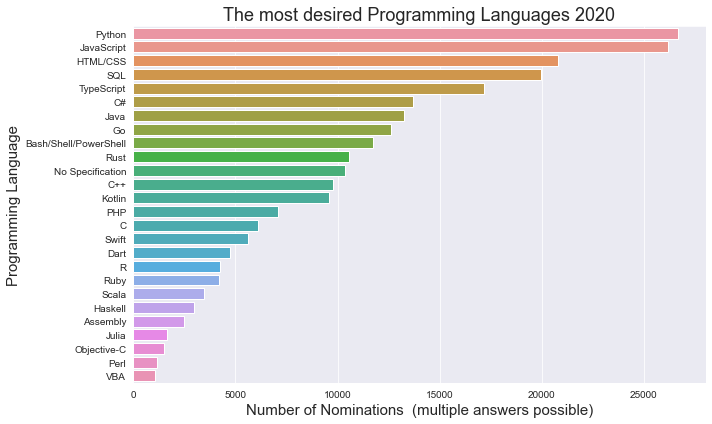

In [12]:
# make barplot and sort bars
plt.figure(figsize=(10,6))
sns.barplot(x="Respondent",
            y="LanguageDesireNextYear",
            data=df1,
            order=df1.sort_values('Respondent',ascending = False).LanguageDesireNextYear)
# set labels
plt.xlabel("Number of Nominations  (multiple answers possible)", size=15)
plt.ylabel("Programming Language", size=15)
plt.title("The most desired Programming Languages 2020", size=18)
plt.tight_layout()


### Question 2
### What are currently the most used programming languages?

In [13]:
# consideration of the variations
df['LanguageWorkedWith'].value_counts(dropna=False)

NaN                                                                           7083
HTML/CSS;JavaScript;PHP;SQL                                                   1073
HTML/CSS;JavaScript                                                            900
C#;HTML/CSS;JavaScript;SQL                                                     856
C#;HTML/CSS;JavaScript;SQL;TypeScript                                          754
                                                                              ... 
Bash/Shell/PowerShell;C#;Go;HTML/CSS;JavaScript;Python;Rust;SQL;TypeScript       1
Bash/Shell/PowerShell;C#;HTML/CSS;Java;JavaScript;Objective-C;Python;Swift       1
C#;JavaScript;Scala                                                              1
Bash/Shell/PowerShell;C;C#;C++;Java;JavaScript;Python;Ruby;SQL;TypeScript        1
C;HTML/CSS;Java;Perl;PHP;Python;R;Ruby;SQL                                       1
Name: LanguageWorkedWith, Length: 14257, dtype: int64

In [14]:
# replace nulls with 'No Specification'
df['LanguageWorkedWith'].fillna('No Specification', inplace=True)
df['LanguageWorkedWith'].value_counts(dropna=False)

No Specification                                                            7083
HTML/CSS;JavaScript;PHP;SQL                                                 1073
HTML/CSS;JavaScript                                                          900
C#;HTML/CSS;JavaScript;SQL                                                   856
C#;HTML/CSS;JavaScript;SQL;TypeScript                                        754
                                                                            ... 
Bash/Shell/PowerShell;C;C#;C++;Java;JavaScript;Kotlin;Objective-C;Python       1
C;C#;C++;HTML/CSS;Java;JavaScript;Objective-C;Python                           1
Go;HTML/CSS;JavaScript;Python;Swift;TypeScript                                 1
C#;C++;HTML/CSS;Java;JavaScript;SQL;Swift                                      1
HTML/CSS;JavaScript;Objective-C;Ruby;SQL                                       1
Name: LanguageWorkedWith, Length: 14257, dtype: int64

In [15]:
# Splitting the row into array
df.LanguageWorkedWith = df.LanguageWorkedWith.str.split(';')

In [16]:

# Transform each element of a list-like to a row
df2 = df.explode('LanguageWorkedWith')

# Selection of the relvant columns
df2 = df2[['LanguageWorkedWith', 'Respondent']]
# Determination of the number of individual programming languages mentioned and reindexing of the dataframe
df2 = df2.groupby(['LanguageWorkedWith']).count().reset_index()
df2

,LanguageWorkedWith,Respondent
0,Assembly,3553
1,Bash/Shell/PowerShell,18980
2,C,12487
3,C#,18041
4,C++,13707
5,Dart,2280
6,Go,5038
7,HTML/CSS,36181
8,Haskell,1222
9,Java,23074


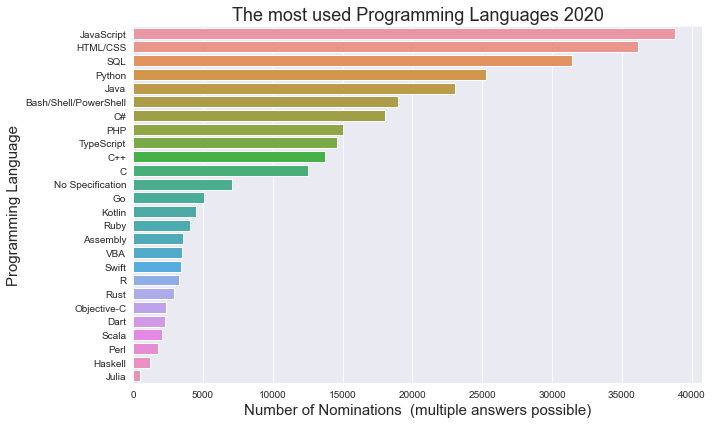

In [17]:
# make barplot and sort bars
plt.figure(figsize=(10,6))
sns.barplot(x="Respondent",
            y="LanguageWorkedWith",
            data=df2,
            order=df2.sort_values('Respondent',ascending = False).LanguageWorkedWith)
# set labels
plt.xlabel("Number of Nominations  (multiple answers possible)", size=15)
plt.ylabel("Programming Language", size=15)
plt.title("The most used Programming Languages 2020", size=18)
plt.tight_layout()

### Question 3
### Is there a coherence between satisfied & dissatisfied Programming Languages?

In [18]:
df['JobSat'].value_counts(dropna=False)

NaN                                   19267
Very satisfied                        14611
Slightly satisfied                    13930
Slightly dissatisfied                  7124
Neither satisfied nor dissatisfied     5783
Very dissatisfied                      3746
Name: JobSat, dtype: int64

In [19]:
# replace nulls with 'No Specification'
df['JobSat'].fillna('No Specification', inplace=True)
df['JobSat'].value_counts(dropna=False)

No Specification                      19267
Very satisfied                        14611
Slightly satisfied                    13930
Slightly dissatisfied                  7124
Neither satisfied nor dissatisfied     5783
Very dissatisfied                      3746
Name: JobSat, dtype: int64

In [20]:
# Expanding the programming languages in individual lines as preparation for grouping
df3 = df[['LanguageWorkedWith','JobSat', 'Respondent']]
df3 = df3.explode('LanguageWorkedWith')
df3 = pd.get_dummies(df3, columns=['JobSat'], prefix='', prefix_sep='')
df3.head()

,LanguageWorkedWith,Respondent,Neither satisfied nor dissatisfied,No Specification,Slightly dissatisfied,Slightly satisfied,Very dissatisfied,Very satisfied
0,C#,1,0,0,0,1,0,0
0,HTML/CSS,1,0,0,0,1,0,0
0,JavaScript,1,0,0,0,1,0,0
1,JavaScript,2,0,0,0,0,1,0
1,Swift,2,0,0,0,0,1,0


In [21]:
# preparation of the numerical kpis for the programs used
df3 = df3.groupby('LanguageWorkedWith', as_index=False
    ).agg(
        {
            'Respondent':pd.Series.nunique,
            'No Specification':sum,
            'Very satisfied':sum,
            'Slightly satisfied':sum,
            'Neither satisfied nor dissatisfied':sum,
            'Slightly dissatisfied':sum,
            'Very dissatisfied':sum
        }
    )
df3

,LanguageWorkedWith,Respondent,No Specification,Very satisfied,Slightly satisfied,Neither satisfied nor dissatisfied,Slightly dissatisfied,Very dissatisfied
0,Assembly,3553,1624.0,707.0,527.0,245.0,287.0,163.0
1,Bash/Shell/PowerShell,18980,3834.0,5435.0,4642.0,1645.0,2297.0,1127.0
2,C,12487,5084.0,2467.0,2190.0,1010.0,1145.0,591.0
3,C#,18041,4122.0,4537.0,4312.0,1770.0,2178.0,1122.0
4,C++,13707,5298.0,2802.0,2561.0,1083.0,1278.0,685.0
5,Dart,2280,774.0,449.0,461.0,222.0,242.0,132.0
6,Go,5038,998.0,1397.0,1211.0,478.0,613.0,341.0
7,HTML/CSS,36181,9694.0,8671.0,8169.0,3281.0,4218.0,2148.0
8,Haskell,1222,494.0,268.0,209.0,90.0,102.0,59.0
9,Java,23074,6988.0,4977.0,4984.0,2173.0,2623.0,1329.0


In [51]:
# calculation of the ratio based on the kpis
df3['No Specification ratio'] = df3['No Specification'] / df3['Respondent']
df3['Very satisfied ratio'] = df3['Very satisfied'] / df3['Respondent']
df3['Slightly satisfied ratio'] = df3['Slightly satisfied'] / df3['Respondent']
df3['Neither satisfied nor dissatisfied ratio'] = df3['Neither satisfied nor dissatisfied'] / df3['Respondent']
df3['Slightly dissatisfied ratio'] = -df3['Slightly dissatisfied'] / df3['Respondent']
df3['Very dissatisfied ratio'] = -df3['Very dissatisfied'] / df3['Respondent']
df3['Satisfied ratio'] = df3['Very satisfied ratio'] + df3['Slightly satisfied ratio']
df3['Dissatisfied ratio'] = -df3['Very dissatisfied ratio'] + df3['Slightly dissatisfied ratio']
df3

,LanguageWorkedWith,Respondent,No Specification,Very satisfied,Slightly satisfied,Neither satisfied nor dissatisfied,Slightly dissatisfied,Very dissatisfied,No Specification ratio,Very satisfied ratio,Slightly satisfied ratio,Neither satisfied nor dissatisfied ratio,Slightly dissatisfied ratio,Very dissatisfied ratio,Satisfied ratio,Dissatisfied ratio
0,Assembly,3553,1624.0,707.0,527.0,245.0,287.0,163.0,0.457079,0.198987,0.148325,0.068956,-0.080777,-0.045877,0.347312,-0.034900
1,Bash/Shell/PowerShell,18980,3834.0,5435.0,4642.0,1645.0,2297.0,1127.0,0.202002,0.286354,0.244573,0.086670,-0.121022,-0.059378,0.530927,-0.061644
2,C,12487,5084.0,2467.0,2190.0,1010.0,1145.0,591.0,0.407143,0.197565,0.175382,0.080884,-0.091695,-0.047329,0.372948,-0.044366
3,C#,18041,4122.0,4537.0,4312.0,1770.0,2178.0,1122.0,0.228480,0.251483,0.239011,0.098110,-0.120725,-0.062192,0.490494,-0.058533
4,C++,13707,5298.0,2802.0,2561.0,1083.0,1278.0,685.0,0.386518,0.204421,0.186839,0.079011,-0.093237,-0.049974,0.391260,-0.043263
5,Dart,2280,774.0,449.0,461.0,222.0,242.0,132.0,0.339474,0.196930,0.202193,0.097368,-0.106140,-0.057895,0.399123,-0.048246
6,Go,5038,998.0,1397.0,1211.0,478.0,613.0,341.0,0.198094,0.277293,0.240373,0.094879,-0.121675,-0.067686,0.517666,-0.053990
7,HTML/CSS,36181,9694.0,8671.0,8169.0,3281.0,4218.0,2148.0,0.267931,0.239656,0.225781,0.090683,-0.116581,-0.059368,0.465438,-0.057212
8,Haskell,1222,494.0,268.0,209.0,90.0,102.0,59.0,0.404255,0.219313,0.171031,0.073650,-0.083470,-0.048282,0.390344,-0.035188
9,Java,23074,6988.0,4977.0,4984.0,2173.0,2623.0,1329.0,0.302852,0.215697,0.216001,0.094175,-0.113678,-0.057597,0.431698,-0.056080


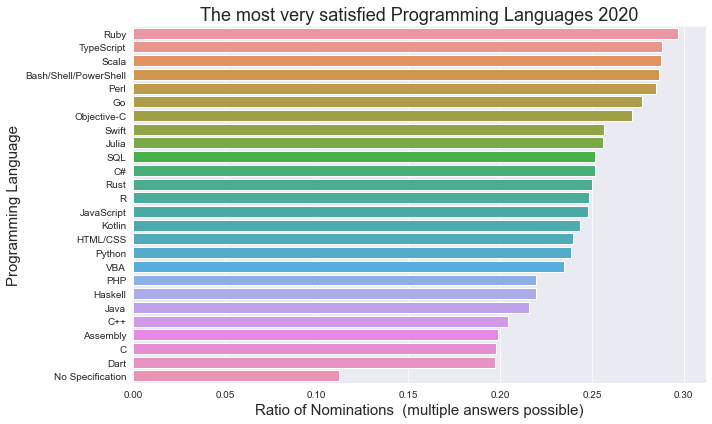

In [23]:
# Get the most the most very satisfied Programming Languages 2020
# make barplot and sort bars
plt.figure(figsize=(10,6))
sns.barplot(x="Very satisfied ratio",
            y="LanguageWorkedWith",
            data=df3,
            order=df3.sort_values('Very satisfied ratio',ascending = False).LanguageWorkedWith)
# set labels
plt.xlabel("Ratio of Nominations  (multiple answers possible)", size=15)
plt.ylabel("Programming Language", size=15)
plt.title("The most very satisfied Programming Languages 2020", size=18)
plt.tight_layout()

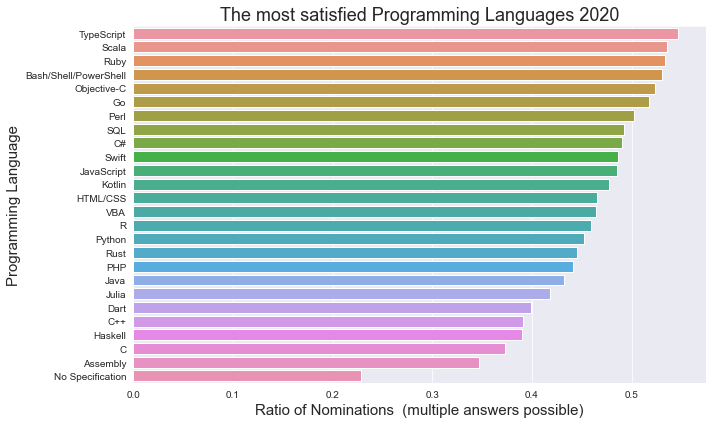

In [80]:
# Get the most the most satisfied Programming Languages 2020
# make barplot and sort bars
plt.figure(figsize=(10,6))
sns.barplot(x="Satisfied ratio",
            y="LanguageWorkedWith",
            data=df3,
            order=df3.sort_values('Satisfied ratio',ascending = False).LanguageWorkedWith)
# set labels
plt.xlabel("Ratio of Nominations  (multiple answers possible)", size=15)
plt.ylabel("Programming Language", size=15)
plt.title("The most satisfied Programming Languages 2020", size=18)
plt.tight_layout()

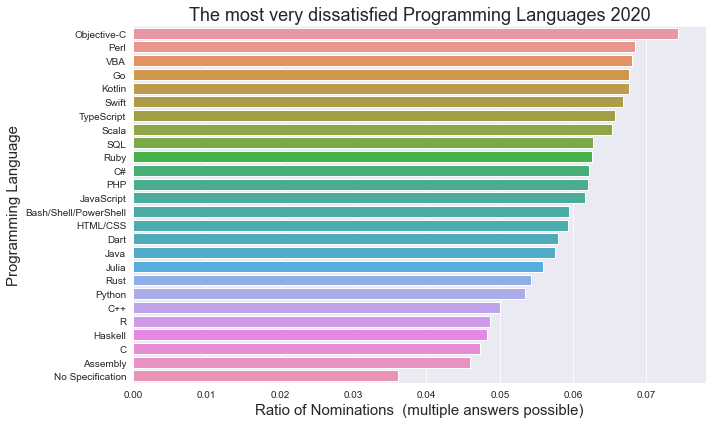

In [25]:
# Get the most very dissatisfied Programming Languages 2020
# make barplot and sort bars
plt.figure(figsize=(10,6))
sns.barplot(x="Very dissatisfied ratio",
            y="LanguageWorkedWith",
            data=df3,
            order=df3.sort_values('Very dissatisfied ratio',ascending = False).LanguageWorkedWith)
# set labels
plt.xlabel("Ratio of Nominations  (multiple answers possible)", size=15)
plt.ylabel("Programming Language", size=15)
plt.title("The most very dissatisfied Programming Languages 2020", size=18)
plt.tight_layout()

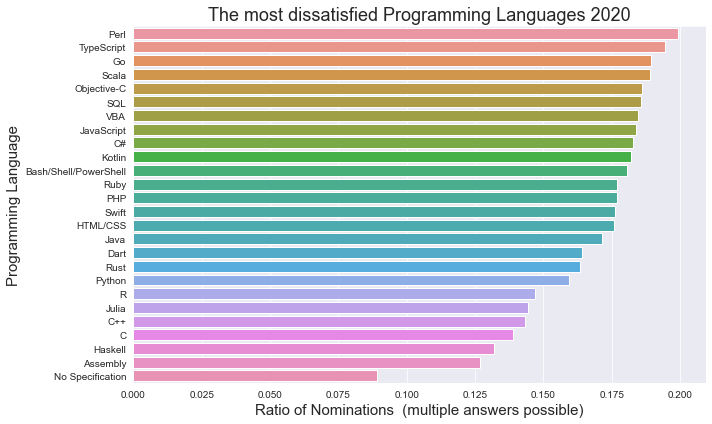

In [26]:
# Get the most dissatisfied Programming Languages 2020
# make barplot and sort bars
plt.figure(figsize=(10,6))
sns.barplot(x="Dissatisfied ratio",
            y="LanguageWorkedWith",
            data=df3,
            order=df3.sort_values('Dissatisfied ratio',ascending = False).LanguageWorkedWith)
# set labels
plt.xlabel("Ratio of Nominations  (multiple answers possible)", size=15)
plt.ylabel("Programming Language", size=15)
plt.title("The most dissatisfied Programming Languages 2020", size=18)
plt.tight_layout()

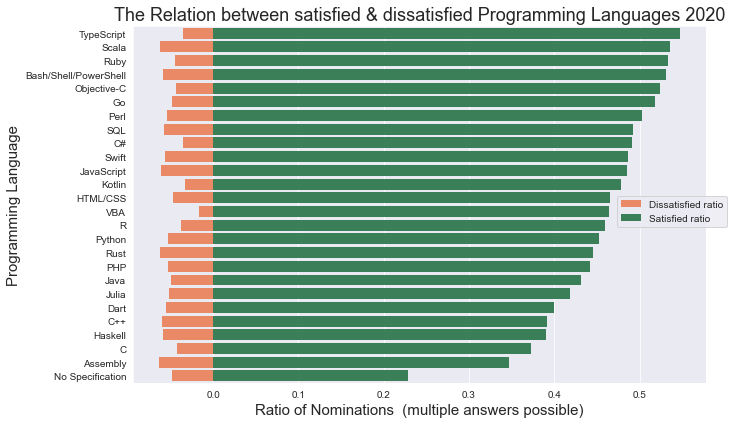

In [77]:
# final chart for answering the business question

ax =plt.figure(figsize=(10,6))
bar_plot = sns.barplot(x='Dissatisfied ratio', y='LanguageWorkedWith', data=df3, label="Dissatisfied ratio", color='coral', lw=0)
bar_plot = sns.barplot(x='Satisfied ratio', y='LanguageWorkedWith', data=df3, label="Satisfied ratio", color='seagreen',order=df3.sort_values('Satisfied ratio',ascending = False).LanguageWorkedWith , lw=0)

plt.xlabel("Ratio of Nominations  (multiple answers possible)", size=15)
plt.ylabel("Programming Language", size=15)
plt.title("The Relation between satisfied & dissatisfied Programming Languages 2020", size=18)
ax.legend(loc='right')
plt.tight_layout()

### Question 4
### Is there a coherence between used and disered language?

In [27]:
df4 = df.explode('LanguageDesireNextYear')
df4 = df4.explode('LanguageWorkedWith')
df4 = df4[['LanguageDesireNextYear', 'LanguageWorkedWith']]
df4 = pd.get_dummies(df4, columns=['LanguageWorkedWith'], prefix='', prefix_sep='')
df4 = df4.groupby(['LanguageDesireNextYear']).sum().reset_index()

In [28]:
df4.head()

,LanguageDesireNextYear,Assembly,Bash/Shell/PowerShell,C,C#,C++,Dart,Go,HTML/CSS,Haskell,Java,JavaScript,Julia,Kotlin,No Specification,Objective-C,PHP,Perl,Python,R,Ruby,Rust,SQL,Scala,Swift,TypeScript,VBA
0,Assembly,1043.0,1376.0,1434.0,897.0,1330.0,152.0,351.0,1584.0,197.0,1167.0,1553.0,81.0,237.0,32.0,176.0,718.0,184.0,1533.0,193.0,246.0,375.0,1237.0,103.0,196.0,515.0,227.0
1,Bash/Shell/PowerShell,1223.0,10199.0,3308.0,3774.0,3330.0,462.0,1550.0,7968.0,402.0,4848.0,8280.0,164.0,859.0,55.0,539.0,3212.0,727.0,6751.0,971.0,1157.0,828.0,7435.0,563.0,664.0,3229.0,894.0
2,C,1245.0,3032.0,4130.0,1769.0,3092.0,295.0,741.0,3596.0,305.0,2804.0,3585.0,142.0,486.0,71.0,364.0,1628.0,409.0,3797.0,514.0,482.0,609.0,3019.0,205.0,412.0,1032.0,412.0
3,C#,930.0,4578.0,2729.0,10762.0,3440.0,499.0,806.0,9582.0,260.0,4646.0,9885.0,101.0,803.0,85.0,482.0,3196.0,331.0,4897.0,623.0,623.0,498.0,9089.0,277.0,659.0,4441.0,1376.0
4,C++,1329.0,4017.0,4252.0,3224.0,5954.0,402.0,909.0,5672.0,331.0,4269.0,5741.0,156.0,707.0,89.0,479.0,2485.0,429.0,5953.0,779.0,608.0,657.0,4804.0,295.0,596.0,1766.0,669.0


<AxesSubplot:>

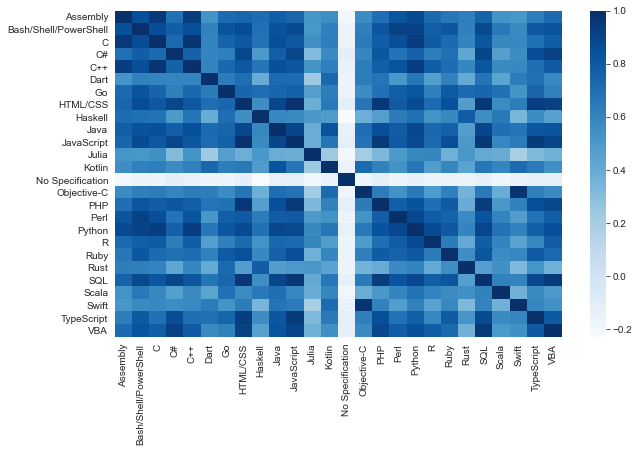

In [79]:
df4.drop(columns=['LanguageDesireNextYear'])
ax = plt.figure(figsize=(10,6))
sns.heatmap(df4.corr(), cmap="Blues")


> At the end of your report, make sure that you export the notebook as an
html file from the `File > Download as... > HTML` menu. Make sure you keep
track of where the exported file goes, so you can put it in the same folder
as this notebook for project submission. Also, make sure you remove all of
the quote-formatted guide notes like this one before you finish your report!